# Master Thesis Script
## Analysing Results from ABM Interventions

This code contains analysis of interventions in terms of average spread and visualisations, multiplicative discernment and the summary Table 14. 

In [187]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import regex as re
import json
import matplotlib.pyplot as plt
import scipy
import statistics
import math
from fitter import Fitter, get_common_distributions, get_distributions
from statistics import mode
from scipy.stats import nbinom
import ast
import random
import seaborn as sns
from joblib import Parallel, delayed
import statsmodels.api as sm
import pickle
import itertools
import statistics as stat
import scipy.stats

In [188]:
df_no_int = pd.read_csv("Intervention_Results/NG_df_no_intervention_1.csv")
df_int_misinfo_1 = pd.read_csv("Intervention_Results/NG_df_intervention_Misinfo_1.csv")
df_int_misinfo_2 = pd.read_csv("Intervention_Results/NG_df_intervention_Misinfo_2.csv")
df_int_misinfo_3 = pd.read_csv("Intervention_Results/NG_df_intervention_Misinfo_3.csv")
df_int_misinfo_4 = pd.read_csv("Intervention_Results/NG_df_intervention_Misinfo_4.csv")
df_int_misinfo_5 = pd.read_csv("Intervention_Results/NG_df_intervention_Misinfo_5.csv")
df_int_affection_1 = pd.read_csv("Intervention_Results/NG_df_intervention_Affection_1.csv")
df_int_affection_2 = pd.read_csv("Intervention_Results/df_intervention_Affection_2.csv")
df_int_affection_3 = pd.read_csv("Intervention_Results/df_intervention_Affection_3.csv")
df_int_affection_4 = pd.read_csv("Intervention_Results/df_intervention_Affection_4.csv")
df_int_affection_5 = pd.read_csv("Intervention_Results/df_intervention_Affection_5.csv")

# No intervention

In [189]:
df_no_int_1 = pd.read_csv("Intervention_Results/Results_August/NG_df_OG_1.csv")
df_no_int_2 = pd.read_csv("Intervention_Results/Results_August/NG_df_OG_2.csv")
df_no_int_3 = pd.read_csv("Intervention_Results/Results_August/NG_df_OG_3.csv")
df_no_int_4 = pd.read_csv("Intervention_Results/Results_August/NG_df_OG_4.csv")
df_no_int_5 = pd.read_csv("Intervention_Results/Results_August/NG_df_OG_5.csv")

In [190]:
# Initialize an empty list to store the means
means_list = []

# Iterate through the sections
for i in range(1, 6):
    section_df = globals()[f'df_no_int_{i}']
    bin_edges = [0, 20, 40, 60, 80, 100]
    section_df['NG_score_bins'] = pd.cut(section_df['NG_score'], bins=bin_edges)
    section_mean = section_df.groupby('NG_score_bins', as_index=False)['Simulated_retweet_count'].mean()
    means_list.append(section_mean["Simulated_retweet_count"].values.tolist())

# Create a DataFrame from the list of means
df = pd.DataFrame(means_list)

# Calculate the mean of each column
no_int_mean = df.mean().tolist()
no_int_sd = df.std().tolist()

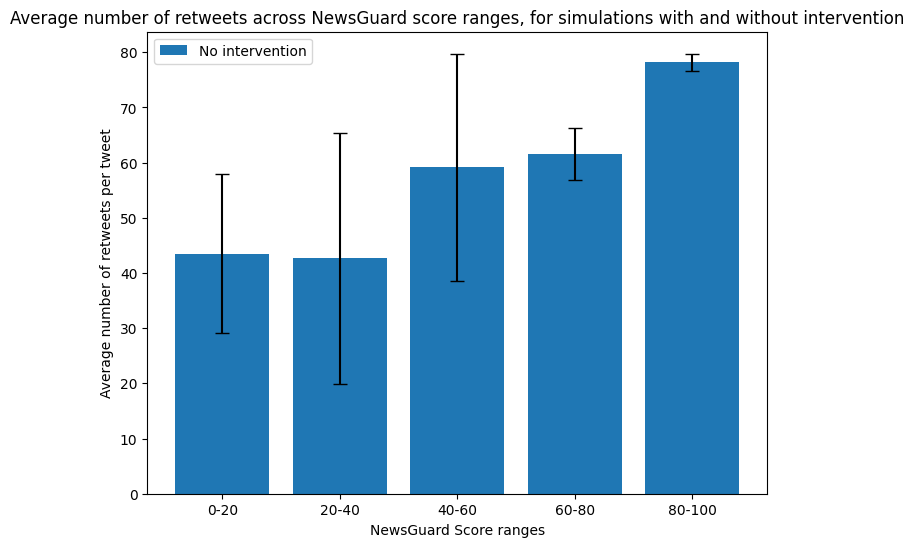

In [194]:
# Plot mean
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the second bar plot
ax.bar(range(len(no_int_mean)), no_int_mean, yerr=no_int_sd, capsize=5, label='No intervention')

# Set the labels and title
ax.set_xlabel('NewsGuard Score ranges')
ax.set_ylabel('Average number of retweets per tweet')
ax.set_title('Average number of retweets across NewsGuard score ranges, for simulations with and without intervention')

# Set the x-tick positions and labels
x_tick_positions = range(len(df.index))
x_tick_labels = ['0-20', '20-40', '40-60', '60-80', '80-100']
ax.set_xticks(x_tick_positions)
ax.set_xticklabels(x_tick_labels)

# Add a legend
ax.legend()

# Show the figure
plt.show()

# Intervention 1: Demoting Misinformation

In [195]:
df_int_Misinfo_1 = pd.read_csv("Intervention_Results/Results_August/NG_df_intervention_Misinfo60_1.csv")
df_int_Misinfo_2 = pd.read_csv("Intervention_Results/Results_August/NG_df_intervention_Misinfo60_2.csv")
df_int_Misinfo_3 = pd.read_csv("Intervention_Results/Results_August/NG_df_intervention_Misinfo60_3.csv")
df_int_Misinfo_4 = pd.read_csv("Intervention_Results/Results_August/NG_df_intervention_Misinfo60_4.csv")
df_int_Misinfo_5 = pd.read_csv("Intervention_Results/Results_August/NG_df_intervention_Misinfo60_5.csv")

In [196]:
# Initialize an empty list to store the means
means_list = []

# Iterate through the sections
for i in range(1, 6):
    section_df = globals()[f'df_int_Misinfo_{i}']
    section_df['NG_score_bins'] = pd.cut(section_df['NG_score'], 5)
    section_mean = section_df.groupby('NG_score_bins', as_index=False)['Simulated_retweet_count'].mean()
    means_list.append(section_mean["Simulated_retweet_count"].values.tolist())

# Create a DataFrame from the list of means
df = pd.DataFrame(means_list)

# Calculate the mean of each column
misinfo_mean = df.mean().tolist()
misinfo_sd = df.std().tolist()

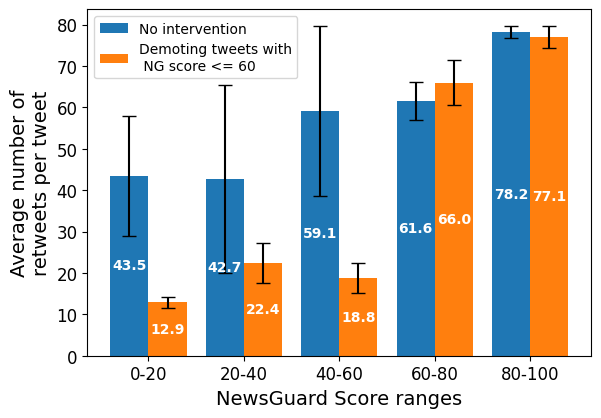

In [202]:
# Plot mean
fig, ax = plt.subplots(figsize=(6.5, 4.5))

# Create positions for each group of bars
bar_width = 0.4  # Adjust this value to set the space between the bars
x_positions_no_int = np.arange(len(no_int_mean))
x_positions_misinfo = x_positions_no_int + bar_width

# Plot the first bar plot
ax.bar(x_positions_no_int, no_int_mean, yerr=no_int_sd, capsize=5, width=bar_width, label='No intervention')

# Plot the second bar plot
ax.bar(x_positions_misinfo, misinfo_mean, yerr=misinfo_sd, capsize=5, width=bar_width, label='Demoting tweets with\n NG score <= 60')

# Add the values to the bars
for x_pos, y_val in zip(x_positions_no_int, no_int_mean):
    ax.text(x_pos, y_val / 2, str(round(y_val, 1)), ha='center', va='center', color='white', fontweight='bold')

for x_pos, y_val in zip(x_positions_misinfo, misinfo_mean):
    ax.text(x_pos, y_val / 2, str(round(y_val, 1)), ha='center', va='center', color='white', fontweight='bold')

# Set the labels and title
ax.set_xlabel('NewsGuard Score ranges', fontsize=14)
ax.set_ylabel('Average number of\nretweets per tweet', fontsize=14)
#ax.set_title('Average number of retweets across NewsGuard score ranges, for simulations with and without intervention')

# Set the x-tick positions and labels
x_tick_positions = x_positions_no_int + bar_width / 2
x_tick_labels = ['0-20', '20-40', '40-60', '60-80', '80-100']
ax.set_xticks(x_tick_positions)
ax.set_xticklabels(x_tick_labels)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Add a legend
ax.legend()
plt.savefig('Figures/Results_int_misinfo.svg', bbox_inches='tight',format='svg')
# Show the figure
plt.show()

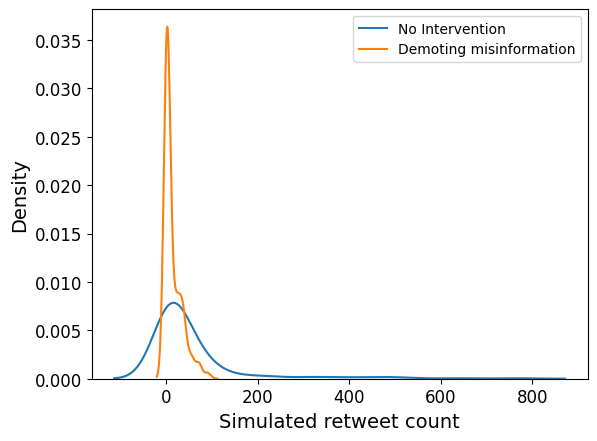

In [199]:
#fig, ax = plt.subplots(figsize=(8, 6))
sns.kdeplot(df_no_int_1['Simulated_retweet_count'][df_no_int_1["NG_score"]<=60].values.tolist(), label = "No Intervention")
sns.kdeplot(df_int_Misinfo_2['Simulated_retweet_count'][df_int_Misinfo_2["NG_score"]<=60], label="Demoting misinformation")
# Add legend
#plt.xscale('log')
plt.xlabel('Simulated retweet count', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('Figures/Results_int_misinfo_kde.svg', bbox_inches='tight',format='svg')
# Display the plot
plt.show()

# Intervention 2: Demoting Anger

In [203]:
df_int_anger_1 = pd.read_csv("Intervention_Results/Results_August/NG_df_anger_1.csv")
df_int_anger_2 = pd.read_csv("Intervention_Results/Results_August/NG_df_anger_2.csv")
df_int_anger_3 = pd.read_csv("Intervention_Results/Results_August/NG_df_anger_3.csv")
df_int_anger_4 = pd.read_csv("Intervention_Results/Results_August/NG_df_anger_4.csv")
df_int_anger_5 = pd.read_csv("Intervention_Results/Results_August/NG_df_anger_5.csv")

In [204]:
# Initialize an empty list to store the means
means_list_anger = []

# Iterate through the sections
for i in range(1, 6):
    section_df = globals()[f'df_int_anger_{i}']
    section_df['NG_score_bins'] = pd.cut(section_df['NG_score'], 5)
    section_mean = section_df.groupby('NG_score_bins', as_index=False)['Simulated_retweet_count'].mean()
    means_list_anger.append(section_mean["Simulated_retweet_count"].values.tolist())

# Create a DataFrame from the list of means
df = pd.DataFrame(means_list_anger)

# Calculate the mean of each column
anger_mean = df.mean().tolist()
anger_sd = df.std().tolist()

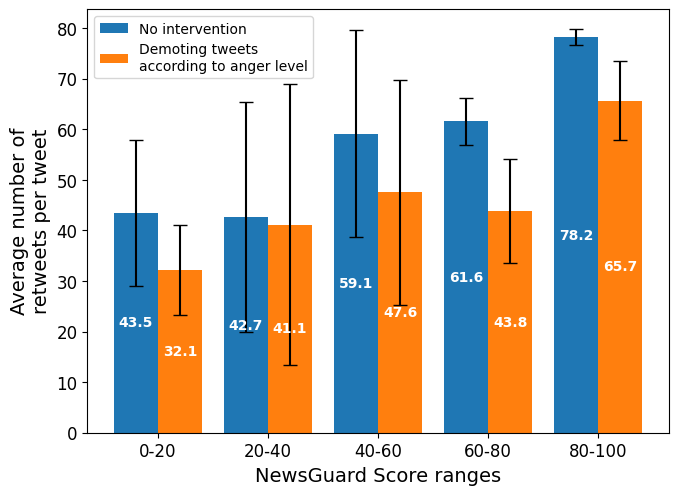

In [209]:
# Plot mean
fig, ax = plt.subplots(figsize=(7.5, 5.5))

# Create positions for each group of bars
bar_width = 0.4  # Adjust this value to set the space between the bars
x_positions_no_int = np.arange(len(no_int_mean))
x_positions_anger = x_positions_no_int + bar_width

# Plot the first bar plot
ax.bar(x_positions_no_int, no_int_mean, yerr=no_int_sd, capsize=5, width=bar_width, label='No intervention')

# Plot the second bar plot
ax.bar(x_positions_anger, anger_mean, yerr=anger_sd, capsize=5, width=bar_width, label='Demoting tweets\naccording to anger level')

# Add the values to the bars
for x_pos, y_val in zip(x_positions_no_int, no_int_mean):
    ax.text(x_pos, y_val / 2, str(round(y_val, 1)), ha='center', va='center', color='white', fontweight='bold')

for x_pos, y_val in zip(x_positions_anger, anger_mean):
    ax.text(x_pos, y_val / 2, str(round(y_val, 1)), ha='center', va='center', color='white', fontweight='bold')

# Set the labels and title
ax.set_xlabel('NewsGuard Score ranges', fontsize=14)
ax.set_ylabel('Average number of\nretweets per tweet', fontsize=14)
#ax.set_title('Average number of retweets across NewsGuard score ranges, for simulations with and without intervention')

# Set the x-tick positions and labels
x_tick_positions = x_positions_no_int + bar_width / 2
x_tick_labels = ['0-20', '20-40', '40-60', '60-80', '80-100']
ax.set_xticks(x_tick_positions)
ax.set_xticklabels(x_tick_labels)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Add a legend
ax.legend()
plt.savefig('Figures/Results_int_anger.svg', bbox_inches='tight',format='svg')
# Show the figure
plt.show()

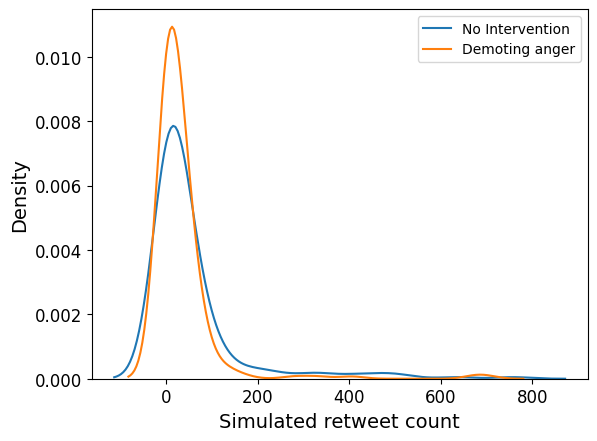

In [13]:
sns.kdeplot(df_no_int_1['Simulated_retweet_count'][df_no_int_1["NG_score"]<=60].values.tolist(), label = "No Intervention")
sns.kdeplot(df_int_anger_5['Simulated_retweet_count'][df_int_anger_5["NG_score"]<=60], label="Demoting anger")
# Add legend
#plt.xscale('log')
plt.xlabel('Simulated retweet count', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('Figures/Results_int_anger_kde.svg', bbox_inches='tight',format='svg')
# Display the plot
plt.show()

# Intervention 3: Boosting Affection

In [210]:
df_int_affection_1 = pd.read_csv("Intervention_Results/Results_August/NG_df_intervention_Affection_1.csv")
df_int_affection_2 = pd.read_csv("Intervention_Results/Results_August/NG_df_intervention_Affection_2.csv")
df_int_affection_3 = pd.read_csv("Intervention_Results/Results_August/NG_df_intervention_Affection_3.csv")
df_int_affection_4 = pd.read_csv("Intervention_Results/Results_August/NG_df_intervention_Affection_4.csv")
df_int_affection_5 = pd.read_csv("Intervention_Results/Results_August/NG_df_intervention_Affection_5.csv")

In [211]:
# Initialize an empty list to store the means
means_list_aff = []

# Iterate through the sections
for i in range(1, 6):
    section_df = globals()[f'df_int_affection_{i}']
    section_df['NG_score_bins'] = pd.cut(section_df['NG_score'], 5)
    section_mean = section_df.groupby('NG_score_bins', as_index=False)['Simulated_retweet_count'].mean()
    means_list_aff.append(section_mean["Simulated_retweet_count"].values.tolist())

# Create a DataFrame from the list of means
df = pd.DataFrame(means_list_aff)

# Calculate the mean of each column
affection_mean = df.mean().tolist()
affection_sd = df.std().tolist()

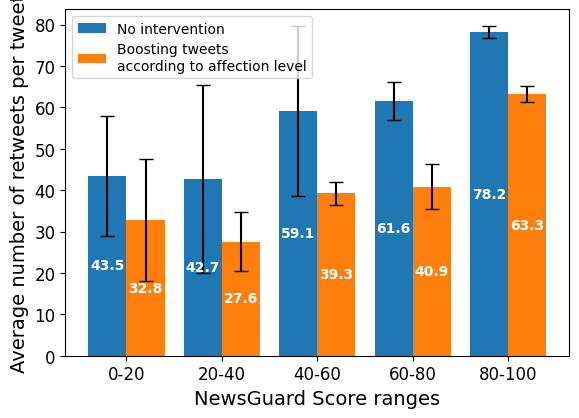

In [213]:
# Plot mean
fig, ax = plt.subplots(figsize=(6.5, 4.5))

# Create positions for each group of bars
bar_width = 0.4  # Adjust this value to set the space between the bars
x_positions_no_int = np.arange(len(no_int_mean))
x_positions_affection= x_positions_no_int + bar_width

# Plot the first bar plot
ax.bar(x_positions_no_int, no_int_mean, yerr=no_int_sd, capsize=5, width=bar_width, label='No intervention')

# Plot the second bar plot
ax.bar(x_positions_affection, affection_mean, yerr=affection_sd, capsize=5, width=bar_width, label='Boosting tweets\naccording to affection level')

# Add the values to the bars
for x_pos, y_val in zip(x_positions_no_int, no_int_mean):
    ax.text(x_pos, y_val / 2, str(round(y_val, 1)), ha='center', va='center', color='white', fontweight='bold')

for x_pos, y_val in zip(x_positions_affection, affection_mean):
    ax.text(x_pos, y_val / 2, str(round(y_val, 1)), ha='center', va='center', color='white', fontweight='bold')

# Set the labels and title
ax.set_xlabel('NewsGuard Score ranges', fontsize=14)
ax.set_ylabel('Average number of retweets per tweet', fontsize=14)
#ax.set_title('Average number of retweets across NewsGuard score ranges, for simulations with and without intervention')

# Set the x-tick positions and labels
x_tick_positions = x_positions_no_int + bar_width / 2
x_tick_labels = ['0-20', '20-40', '40-60', '60-80', '80-100']
ax.set_xticks(x_tick_positions)
ax.set_xticklabels(x_tick_labels)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Add a legend
ax.legend()
plt.savefig('Figures/Results_int_affection.svg', bbox_inches='tight',format='svg')
# Show the figure
plt.show()

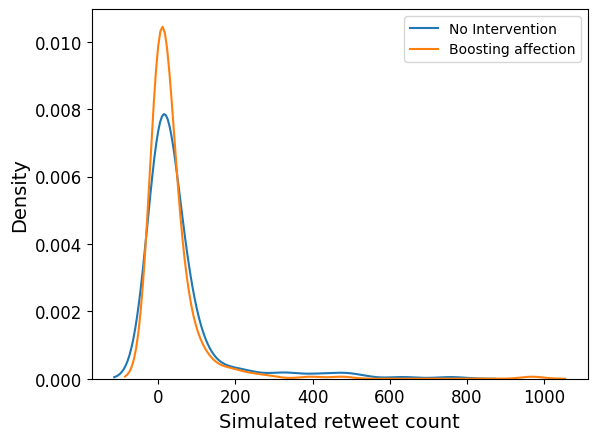

In [17]:
sns.kdeplot(df_no_int_1['Simulated_retweet_count'][df_no_int_1["NG_score"]<=60].values.tolist(), label = "No Intervention")
sns.kdeplot(df_int_affection_1['Simulated_retweet_count'][df_int_affection_1["NG_score"]<=60], label="Boosting affection")
# Add legend
#plt.xscale('log')
plt.xlabel('Simulated retweet count', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.savefig('Figures/Results_int_affection_kde.svg', bbox_inches='tight',format='svg')
# Display the plot
plt.show()

# Intervention 4: Demoting Outgroup words

In [214]:
df_int_outgroup_1 = pd.read_csv("Intervention_Results/Results_August/NG_df_outgroup_1.csv")
df_int_outgroup_2 = pd.read_csv("Intervention_Results/Results_August/NG_df_outgroup_2.csv")
df_int_outgroup_3 = pd.read_csv("Intervention_Results/Results_August/NG_df_outgroup_3.csv")
df_int_outgroup_4 = pd.read_csv("Intervention_Results/Results_August/NG_df_outgroup_4.csv")
df_int_outgroup_5 = pd.read_csv("Intervention_Results/Results_August/NG_df_outgroup_5.csv")

In [215]:
# Initialize an empty list to store the means
means_list_outgroup = []

# Iterate through the sections
for i in range(1, 6):
    section_df = globals()[f'df_int_outgroup_{i}']
    section_df['NG_score_bins'] = pd.cut(section_df['NG_score'], 5)
    section_mean = section_df.groupby('NG_score_bins', as_index=False)['Simulated_retweet_count'].mean()
    means_list_outgroup.append(section_mean["Simulated_retweet_count"].values.tolist())

# Create a DataFrame from the list of means
df = pd.DataFrame(means_list_outgroup)

# Calculate the mean of each column
outgroup_mean = df.mean().tolist()
outgroup_sd = df.std().tolist()

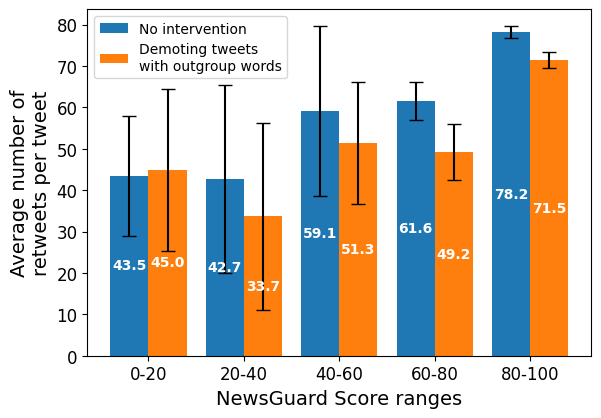

In [218]:
# Plot mean
fig, ax = plt.subplots(figsize=(6.5, 4.5))

# Create positions for each group of bars
bar_width = 0.4  # Adjust this value to set the space between the bars
x_positions_no_int = np.arange(len(no_int_mean))
x_positions_outgroup = x_positions_no_int + bar_width

# Plot the first bar plot
ax.bar(x_positions_no_int, no_int_mean, yerr=no_int_sd, capsize=5, width=bar_width, label='No intervention')

# Plot the second bar plot
ax.bar(x_positions_outgroup, outgroup_mean, yerr=outgroup_sd, capsize=5, width=bar_width, label='Demoting tweets\nwith outgroup words')

# Add the values to the bars
for x_pos, y_val in zip(x_positions_no_int, no_int_mean):
    ax.text(x_pos, y_val / 2, str(round(y_val, 1)), ha='center', va='center', color='white', fontweight='bold')

for x_pos, y_val in zip(x_positions_outgroup, outgroup_mean):
    ax.text(x_pos, y_val / 2, str(round(y_val, 1)), ha='center', va='center', color='white', fontweight='bold')

# Set the labels and title
ax.set_xlabel('NewsGuard Score ranges', fontsize=14)
ax.set_ylabel('Average number of\nretweets per tweet', fontsize=14)
#ax.set_title('Average number of retweets across NewsGuard score ranges, for simulations with and without intervention')

# Set the x-tick positions and labels
x_tick_positions = x_positions_no_int + bar_width / 2
x_tick_labels = ['0-20', '20-40', '40-60', '60-80', '80-100']
ax.set_xticks(x_tick_positions)
ax.set_xticklabels(x_tick_labels)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Add a legend
ax.legend()
plt.savefig('Figures/Results_int_outgroup.svg', bbox_inches='tight',format='svg')
# Show the figure
plt.show()

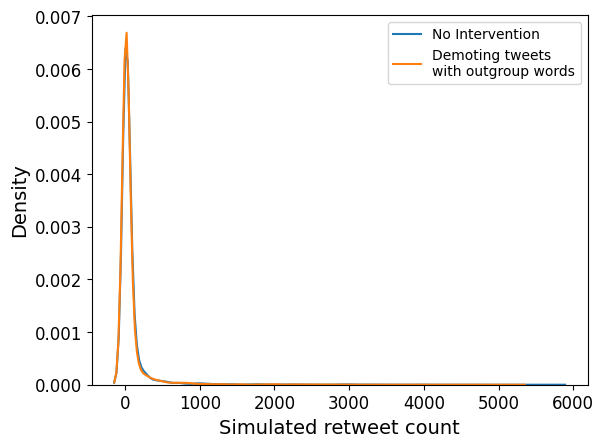

In [21]:
sns.kdeplot(df_no_int_1['Simulated_retweet_count'][df_no_int_1["NG_score"]>=80].values.tolist(), label = "No Intervention")
sns.kdeplot(df_int_outgroup_3['Simulated_retweet_count'][df_int_outgroup_3["NG_score"]>=80], label="Demoting tweets\nwith outgroup words")
# Add legend
#plt.xscale('log')
plt.xlabel('Simulated retweet count', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.savefig('Figures/Results_int_outgroup_kde.svg', bbox_inches='tight',format='svg')
# Display the plot
plt.show()

# Intervention 5: Boosting tweets with low author follower count

In [219]:
df_int_lowfoll_1 = pd.read_csv("Intervention_Results/Results_August/NG_df_intervention_LowFoll_1.csv")
df_int_lowfoll_2 = pd.read_csv("Intervention_Results/Results_August/NG_df_intervention_LowFoll_2.csv")
df_int_lowfoll_3 = pd.read_csv("Intervention_Results/Results_August/NG_df_intervention_LowFoll_3.csv")
df_int_lowfoll_4 = pd.read_csv("Intervention_Results/Results_August/NG_df_intervention_LowFoll_4.csv")
df_int_lowfoll_5 = pd.read_csv("Intervention_Results/Results_August/NG_df_intervention_LowFoll_5.csv")

In [220]:
# Initialize an empty list to store the means
means_list_lowfoll = []

# Iterate through the sections
for i in range(1, 6):
    section_df = globals()[f'df_int_lowfoll_{i}']
    section_df['NG_score_bins'] = pd.cut(section_df['NG_score'], 5)
    section_mean = section_df.groupby('NG_score_bins', as_index=False)['Simulated_retweet_count'].mean()
    means_list_lowfoll.append(section_mean["Simulated_retweet_count"].values.tolist())

# Create a DataFrame from the list of means
df = pd.DataFrame(means_list_lowfoll)

# Calculate the mean of each column
lowfoll_mean = df.mean().tolist()
lowfoll_sd = df.std().tolist()

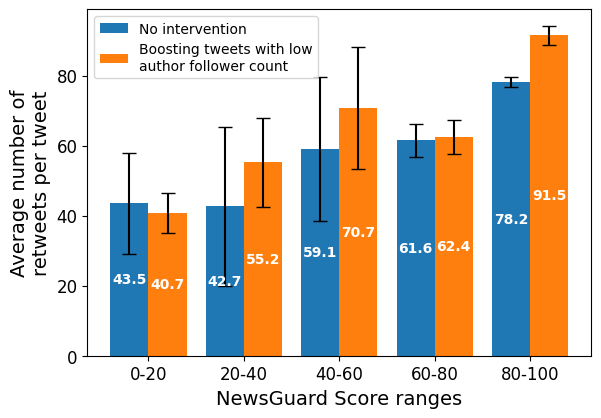

In [223]:
# Plot mean
fig, ax = plt.subplots(figsize=(6.5, 4.5))

# Create positions for each group of bars
bar_width = 0.4  # Adjust this value to set the space between the bars
x_positions_no_int = np.arange(len(no_int_mean))
x_positions_lowfoll = x_positions_no_int + bar_width

# Plot the first bar plot
ax.bar(x_positions_no_int, no_int_mean, yerr=no_int_sd, capsize=5, width=bar_width, label='No intervention')

# Plot the second bar plot
ax.bar(x_positions_lowfoll, lowfoll_mean, yerr=lowfoll_sd, capsize=5, width=bar_width, label='Boosting tweets with low\nauthor follower count')

# Add the values to the bars
for x_pos, y_val in zip(x_positions_no_int, no_int_mean):
    ax.text(x_pos, y_val / 2, str(round(y_val, 1)), ha='center', va='center', color='white', fontweight='bold')

for x_pos, y_val in zip(x_positions_lowfoll, lowfoll_mean):
    ax.text(x_pos, y_val / 2, str(round(y_val, 1)), ha='center', va='center', color='white', fontweight='bold')

# Set the labels and title
ax.set_xlabel('NewsGuard Score ranges', fontsize=14)
ax.set_ylabel('Average number of\nretweets per tweet', fontsize=14)
#ax.set_title('Average number of retweets across NewsGuard score ranges, for simulations with and without intervention')

# Set the x-tick positions and labels
x_tick_positions = x_positions_no_int + bar_width / 2
x_tick_labels = ['0-20', '20-40', '40-60', '60-80', '80-100']
ax.set_xticks(x_tick_positions)
ax.set_xticklabels(x_tick_labels)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Add a legend
ax.legend()
plt.savefig('Figures/Results_int_lowfoll.svg', bbox_inches='tight',format='svg')
# Show the figure
plt.show()

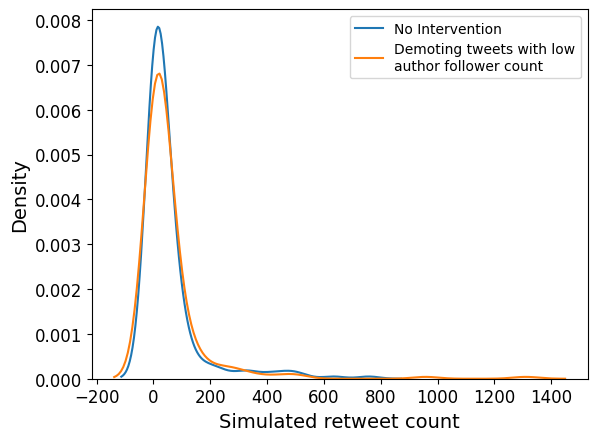

In [25]:
sns.kdeplot(df_no_int_1['Simulated_retweet_count'][df_no_int_1["NG_score"]<=60].values.tolist(), label = "No Intervention")
sns.kdeplot(df_int_lowfoll_3['Simulated_retweet_count'][df_int_lowfoll_3["NG_score"]<=60], label="Demoting tweets with low\nauthor follower count")
# Add legend
#plt.xscale('log')
plt.xlabel('Simulated retweet count', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('Figures/Results_int_lowfoll_kde.svg', bbox_inches='tight',format='svg')
# Display the plot
plt.show()

# Intervention 6: Balancing out author parties in feed

In [224]:
df_int_partybalance_1 = pd.read_csv("Intervention_Results/Results_August/NG_df_partybalance_1.csv")
df_int_partybalance_2 = pd.read_csv("Intervention_Results/Results_August/NG_df_partybalance_2.csv")
df_int_partybalance_3 = pd.read_csv("Intervention_Results/Results_August/NG_df_partybalance_3.csv")
df_int_partybalance_4 = pd.read_csv("Intervention_Results/Results_August/NG_df_partybalance_4.csv")
df_int_partybalance_5 = pd.read_csv("Intervention_Results/Results_August/NG_df_partybalance_5.csv")

In [225]:
# Initialize an empty list to store the means
means_list_party = []

# Iterate through the sections
for i in range(1, 6):
    section_df = globals()[f'df_int_partybalance_{i}']
    section_df['NG_score_bins'] = pd.cut(section_df['NG_score'], 5)
    section_mean = section_df.groupby('NG_score_bins', as_index=False)['Simulated_retweet_count'].mean()
    means_list_party.append(section_mean["Simulated_retweet_count"].values.tolist())

# Create a DataFrame from the list of means
df = pd.DataFrame(means_list_party)

# Calculate the mean of each column
partybalance_mean = df.mean().tolist()
partybalance_sd = df.std().tolist()

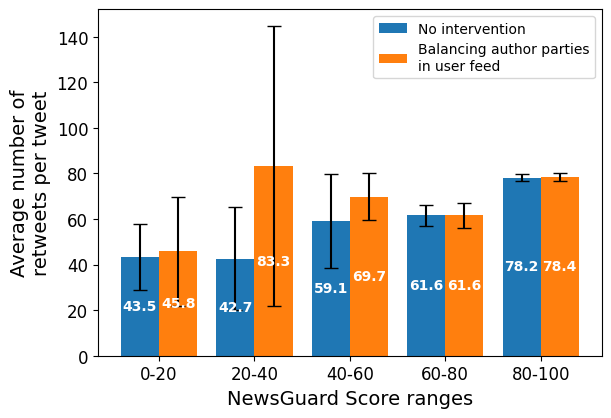

In [227]:
# Plot mean
fig, ax = plt.subplots(figsize=(6.5, 4.5))

# Create positions for each group of bars
bar_width = 0.4  # Adjust this value to set the space between the bars
x_positions_no_int = np.arange(len(no_int_mean))
x_positions_partybalance = x_positions_no_int + bar_width

# Plot the first bar plot
ax.bar(x_positions_no_int, no_int_mean, yerr=no_int_sd, capsize=5, width=bar_width, label='No intervention')

# Plot the second bar plot
ax.bar(x_positions_partybalance, partybalance_mean, yerr=partybalance_sd, capsize=5, width=bar_width, label='Balancing author parties\nin user feed')

# Add the values to the bars
for x_pos, y_val in zip(x_positions_no_int, no_int_mean):
    ax.text(x_pos, y_val / 2, str(round(y_val, 1)), ha='center', va='center', color='white', fontweight='bold')

for x_pos, y_val in zip(x_positions_partybalance, partybalance_mean):
    ax.text(x_pos, y_val / 2, str(round(y_val, 1)), ha='center', va='center', color='white', fontweight='bold')

# Set the labels and title
ax.set_xlabel('NewsGuard Score ranges', fontsize=14)
ax.set_ylabel('Average number of\nretweets per tweet', fontsize=14)
#ax.set_title('Average number of retweets across NewsGuard score ranges, for simulations with and without intervention')

# Set the x-tick positions and labels
x_tick_positions = x_positions_no_int + bar_width / 2
x_tick_labels = ['0-20', '20-40', '40-60', '60-80', '80-100']
ax.set_xticks(x_tick_positions)
ax.set_xticklabels(x_tick_labels)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Add a legend
ax.legend()
plt.savefig('Figures/Results_int_partybalance.svg', bbox_inches='tight',format='svg')
# Show the figure
plt.show()

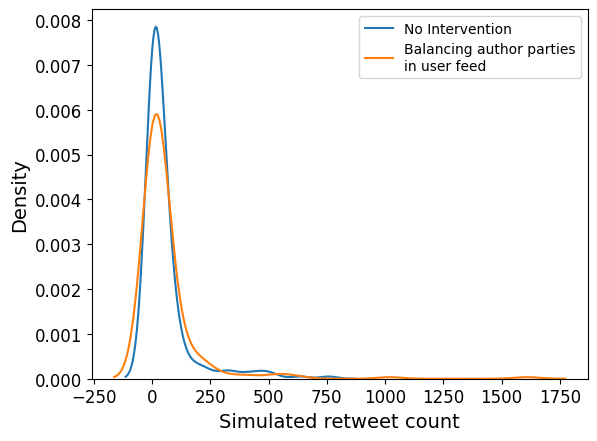

In [29]:
sns.kdeplot(df_no_int_1['Simulated_retweet_count'][df_no_int_1["NG_score"]<=60].values.tolist(), label = "No Intervention")
sns.kdeplot(df_int_partybalance_1['Simulated_retweet_count'][df_int_partybalance_1["NG_score"]<=60], label="Balancing author parties\nin user feed")
# Add legend
#plt.xscale('log')
plt.xlabel('Simulated retweet count', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('Figures/Results_int_partybalance_kde.svg', bbox_inches='tight',format='svg')
# Display the plot
plt.show()

# Intervention 7: Combining intervention for anger & low follower count

In [228]:
df_int_combo_1 = pd.read_csv("Intervention_Results/Results_August/NG_df_combo_1.csv")
df_int_combo_2 = pd.read_csv("Intervention_Results/Results_August/NG_df_combo_2.csv")
df_int_combo_3 = pd.read_csv("Intervention_Results/Results_August/NG_df_combo_3.csv")
df_int_combo_4 = pd.read_csv("Intervention_Results/Results_August/NG_df_combo_4.csv")
df_int_combo_5 = pd.read_csv("Intervention_Results/Results_August/NG_df_combo_5.csv")

In [229]:
# Initialize an empty list to store the means
means_list_combo = []

# Iterate through the sections
for i in range(1, 6):
    section_df = globals()[f'df_int_combo_{i}']
    section_df['NG_score_bins'] = pd.cut(section_df['NG_score'], 5)
    section_mean = section_df.groupby('NG_score_bins', as_index=False)['Simulated_retweet_count'].mean()
    means_list_combo.append(section_mean["Simulated_retweet_count"].values.tolist())

# Create a DataFrame from the list of means
df = pd.DataFrame(means_list_combo)

# Calculate the mean of each column
combo_mean = df.mean().tolist()
combo_sd = df.std().tolist()

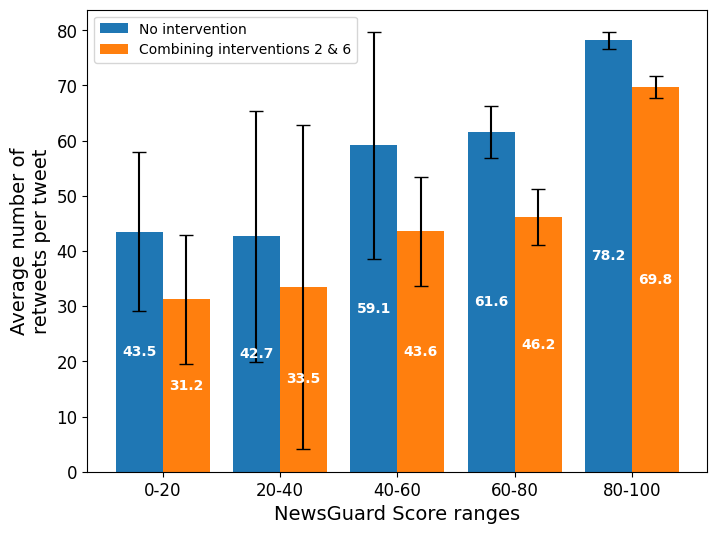

In [233]:
# Plot mean
fig, ax = plt.subplots(figsize=(8,6))

# Create positions for each group of bars
bar_width = 0.4  # Adjust this value to set the space between the bars
x_positions_no_int = np.arange(len(no_int_mean))
x_positions_combo = x_positions_no_int + bar_width

# Plot the first bar plot
ax.bar(x_positions_no_int, no_int_mean, yerr=no_int_sd, capsize=5, width=bar_width, label='No intervention')

# Plot the second bar plot
ax.bar(x_positions_combo, combo_mean, yerr=combo_sd, capsize=5, width=bar_width, label='Combining interventions 2 & 6')

# Add the values to the bars
for x_pos, y_val in zip(x_positions_no_int, no_int_mean):
    ax.text(x_pos, y_val / 2, str(round(y_val, 1)), ha='center', va='center', color='white', fontweight='bold')

for x_pos, y_val in zip(x_positions_combo, combo_mean):
    ax.text(x_pos, y_val / 2, str(round(y_val, 1)), ha='center', va='center', color='white', fontweight='bold')

# Set the labels and title
ax.set_xlabel('NewsGuard Score ranges', fontsize=14)
ax.set_ylabel('Average number of\nretweets per tweet', fontsize=14)
#ax.set_title('Average number of retweets across NewsGuard score ranges, for simulations with and without intervention')

# Set the x-tick positions and labels
x_tick_positions = x_positions_no_int + bar_width / 2
x_tick_labels = ['0-20', '20-40', '40-60', '60-80', '80-100']
ax.set_xticks(x_tick_positions)
ax.set_xticklabels(x_tick_labels)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Add a legend
ax.legend()
plt.savefig('Figures/Results_int_combo.svg', bbox_inches='tight',format='svg')
# Show the figure
plt.show()

# Intervention 8: DW-Nominate score

In [234]:
df_int_DW_Nom_1 = pd.read_csv("Intervention_Results/Results_August/NG_df_DW_Nom_1.csv")
df_int_DW_Nom_2 = pd.read_csv("Intervention_Results/Results_August/NG_df_DW_Nom_2.csv")
df_int_DW_Nom_3 = pd.read_csv("Intervention_Results/Results_August/NG_df_DW_Nom_3.csv")
df_int_DW_Nom_4 = pd.read_csv("Intervention_Results/Results_August/NG_df_DW_Nom_4.csv")
df_int_DW_Nom_5 = pd.read_csv("Intervention_Results/Results_August/NG_df_DW_Nom_5.csv")

In [235]:
# Initialize an empty list to store the means
means_list_DW_Nom = []

# Iterate through the sections
for i in range(1,6):
    section_df = globals()[f'df_int_DW_Nom_{i}']
    section_df['NG_score_bins'] = pd.cut(section_df['NG_score'], 5)
    section_mean = section_df.groupby('NG_score_bins', as_index=False)['Simulated_retweet_count'].mean()
    means_list_DW_Nom.append(section_mean["Simulated_retweet_count"].values.tolist())

# Create a DataFrame from the list of means
df = pd.DataFrame(means_list_DW_Nom)

# Calculate the mean of each column
DW_Nom_mean = df.mean().tolist()
DW_Nom_sd = df.std().tolist()

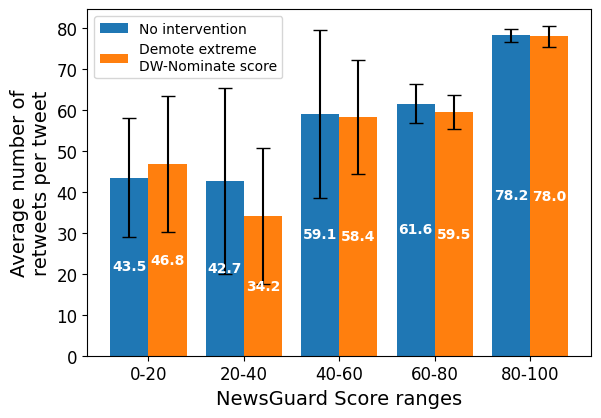

In [237]:
# Plot mean
fig, ax = plt.subplots(figsize=(6.5, 4.5))

# Create positions for each group of bars
bar_width = 0.4  # Adjust this value to set the space between the bars
x_positions_no_int = np.arange(len(no_int_mean))
x_positions_DW_Nom = x_positions_no_int + bar_width

# Plot the first bar plot
ax.bar(x_positions_no_int, no_int_mean, yerr=no_int_sd, capsize=5, width=bar_width, label='No intervention')

# Plot the second bar plot
ax.bar(x_positions_DW_Nom, DW_Nom_mean, yerr=DW_Nom_sd, capsize=5, width=bar_width, label='Demote extreme\nDW-Nominate score')

# Add the values to the bars
for x_pos, y_val in zip(x_positions_no_int, no_int_mean):
    ax.text(x_pos, y_val / 2, str(round(y_val, 1)), ha='center', va='center', color='white', fontweight='bold')

for x_pos, y_val in zip(x_positions_DW_Nom, DW_Nom_mean):
    ax.text(x_pos, y_val / 2, str(round(y_val, 1)), ha='center', va='center', color='white', fontweight='bold')

# Set the labels and title
ax.set_xlabel('NewsGuard Score ranges', fontsize=14)
ax.set_ylabel('Average number of\nretweets per tweet', fontsize=14)
#ax.set_title('Average number of retweets across NewsGuard score ranges, for simulations with and without intervention')

# Set the x-tick positions and labels
x_tick_positions = x_positions_no_int + bar_width / 2
x_tick_labels = ['0-20', '20-40', '40-60', '60-80', '80-100']
ax.set_xticks(x_tick_positions)
ax.set_xticklabels(x_tick_labels)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Add a legend
ax.legend()
plt.savefig('Figures/Results_int_DW_Nom.svg', bbox_inches='tight',format='svg')
# Show the figure
plt.show()

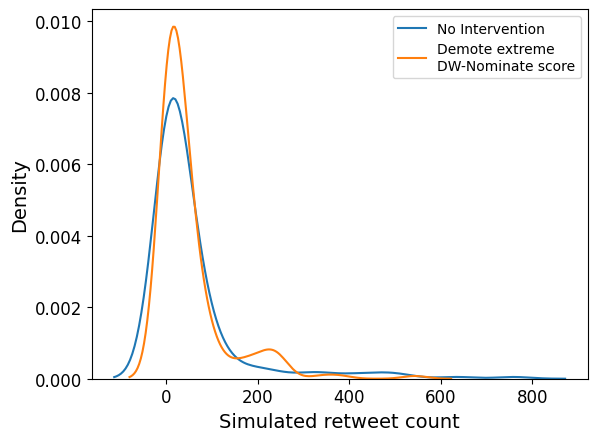

In [41]:
sns.kdeplot(df_no_int_1['Simulated_retweet_count'][df_no_int_1["NG_score"]<=60].values.tolist(), label = "No Intervention")
sns.kdeplot(df_int_DW_Nom_3['Simulated_retweet_count'][df_int_DW_Nom_3["NG_score"]<=60], label="Demote extreme\nDW-Nominate score")
# Add legend
#plt.xscale('log')
plt.xlabel('Simulated retweet count', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('Figures/Results_int_DW_Nom_kde.svg', bbox_inches='tight',format='svg')
# Display the plot
plt.show()

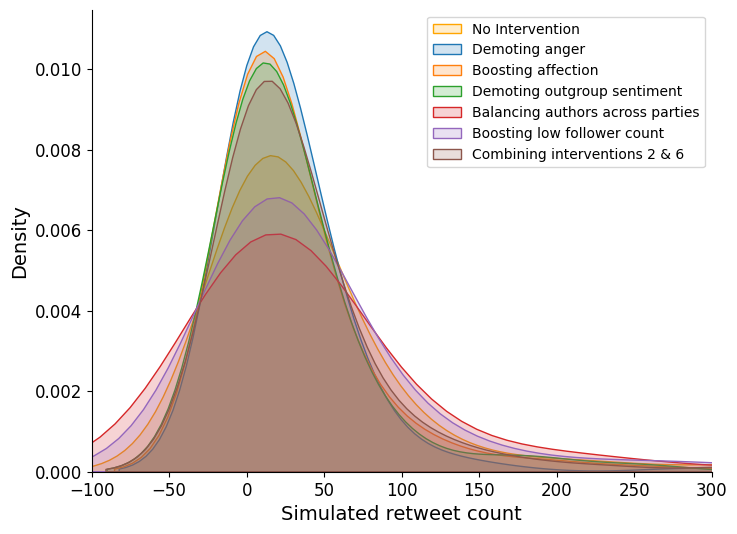

In [42]:
# no intervention
plt.figure(figsize=(8, 6))
sns.kdeplot(df_no_int_1['Simulated_retweet_count'][df_no_int_1["NG_score"]<=60],fill=True, alpha=0.2, color = "orange", label = "No Intervention")
# demote misinfo with cut-off 60
#sns.kdeplot(df_int_Misinfo_2['Simulated_retweet_count'][df_int_Misinfo_2["NG_score"]<=60], fill=True, alpha=0.2,label="Demoting low NG score")
# demote anger
sns.kdeplot(df_int_anger_5['Simulated_retweet_count'][df_int_anger_5["NG_score"]<=60], fill=True, alpha=0.2, label="Demoting anger")
# boost affection
sns.kdeplot(df_int_affection_1['Simulated_retweet_count'][df_int_affection_1["NG_score"]<=60], fill=True, alpha=0.2, label="Boosting affection")
# demote outgroup words
sns.kdeplot(df_int_outgroup_3['Simulated_retweet_count'][df_int_outgroup_3["NG_score"]<=60], fill=True, alpha=0.2, label="Demoting outgroup sentiment")
# balance out other parties
sns.kdeplot(df_int_partybalance_1['Simulated_retweet_count'][df_int_partybalance_1["NG_score"]<=60], fill=True, alpha=0.2, label="Balancing authors across parties")
# boost in case of low follower count
sns.kdeplot(df_int_lowfoll_3['Simulated_retweet_count'][df_int_lowfoll_3["NG_score"]<=60], fill=True, alpha=0.2, label="Boosting low follower count")
# combination
sns.kdeplot(df_int_combo_1['Simulated_retweet_count'][df_int_combo_1["NG_score"]<=60], fill=True, alpha=0.2, label="Combining interventions 2 & 6")


plt.xlim(-100,300)
# Remove upper and right border
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Simulated retweet count", fontsize = 14)
plt.ylabel("Density", fontsize = 14)
sns.despine()
plt.legend()
# Display the plot
plt.savefig('Figures/Results_int_all_ints_kde.svg', bbox_inches='tight',format='svg')
plt.show()

# Summary Table

In [43]:
# count number of retweets for low NG tweets, among all tweets
# no intervention
# Initialize an empty list to store the means
means_list = []
total_RT_control_lst = []
# Iterate through the sections
for i in range(1, 6):
    section_df = globals()[f'df_no_int_{i}']
    bin_edges = [0, 20, 40, 60, 80, 100]
    section_df['NG_score_bins'] = pd.cut(section_df['NG_score'], bins=bin_edges)
    section_mean = section_df.groupby('NG_score_bins', as_index=False)['Simulated_retweet_count'].sum()
    means_list.append(section_mean["Simulated_retweet_count"].values.tolist())
    total_RT_control = section_df['Simulated_retweet_count'].sum()
    total_RT_control_lst.append(total_RT_control)
# Create a DataFrame from the list of means
df = pd.DataFrame(means_list)

# Calculate the mean of each column
no_int_mean = df.mean().tolist()
no_int_sd = df.std().tolist()

In [44]:
no_int_mean

[2544.82448, 667.6603000000001, 7882.22484, 78920.86228, 409135.21956]

In [45]:
print(f"Share of retweets for NG <=20 {(no_int_mean[0])/sum(no_int_mean)}")

Share of retweets for NG <=20 0.005098308013409075


In [46]:
print(f"Share of retweets for NG <=40 {(no_int_mean[0]+no_int_mean[1])/sum(no_int_mean)}")

Share of retweets for NG <=40 0.006435900403169923


In [47]:
print(f"Share of retweets for NG <=40 {(no_int_mean[0]+no_int_mean[1]++no_int_mean[2])/sum(no_int_mean)}")

Share of retweets for NG <=40 0.02222717024558517


In [48]:
print(f"Share of retweets for NG >=80 {(no_int_mean[4])/sum(no_int_mean)}")

Share of retweets for NG >=80 0.819662568025371


In [49]:
# demoting low NG scores

In [50]:
# Initialize an empty list to store the means
means_list = []
total_RTs_misinfo_lst = []
# Iterate through the sections
for i in range(1, 6):
    section_df = globals()[f'df_int_Misinfo_{i}']
    section_df['NG_score_bins'] = pd.cut(section_df['NG_score'], 5)
    section_mean = section_df.groupby('NG_score_bins', as_index=False)['Simulated_retweet_count'].sum()
    means_list.append(section_mean["Simulated_retweet_count"].values.tolist())
    total_RTs_misinfo = section_df['Simulated_retweet_count'].sum()
    total_RTs_misinfo_lst.append(total_RTs_misinfo)
# Create a DataFrame from the list of means
df = pd.DataFrame(means_list)

# Calculate the mean of each column
misinfo_mean = df.mean().tolist()
misinfo_sd = df.std().tolist()

In [51]:
print(f"Share of retweets for NG <=20 {(misinfo_mean[0])/sum(misinfo_mean)}")

Share of retweets for NG <=20 0.0015220148010560205


In [52]:
print(f"Share of retweets for NG <=40 {(misinfo_mean[0]+misinfo_mean[1])/sum(misinfo_mean)}")

Share of retweets for NG <=40 0.0022338530538180304


In [53]:
print(f"Share of retweets for NG <=60 {(misinfo_mean[0]+misinfo_mean[1]+misinfo_mean[2])/sum(misinfo_mean)}")

Share of retweets for NG <=60 0.007854384573665326


In [54]:
print(f"Share of retweets for NG >=80 {(misinfo_mean[4])/sum(misinfo_mean)}")

Share of retweets for NG >=80 0.8173731623114304


In [55]:
# demote anger

In [56]:
# Initialize an empty list to store the means
means_list = []
total_RTs_anger_lst = []
# Iterate through the sections
for i in range(1, 6):
    section_df = globals()[f'df_int_anger_{i}']
    section_df['NG_score_bins'] = pd.cut(section_df['NG_score'], 5)
    section_mean = section_df.groupby('NG_score_bins', as_index=False)['Simulated_retweet_count'].sum()
    means_list.append(section_mean["Simulated_retweet_count"].values.tolist())
    total_RTs_anger =section_df['Simulated_retweet_count'].sum()
    total_RTs_anger_lst.append(total_RTs_anger)
# Create a DataFrame from the list of means
df = pd.DataFrame(means_list)

# Calculate the mean of each column
anger_mean = df.mean().tolist()
anger_sd = df.std().tolist()

In [57]:
print(f"Share of retweets for NG <=20 {(anger_mean[0])/sum(anger_mean)}")

Share of retweets for NG <=20 0.004668848561487941


In [58]:
print(f"Share of retweets for NG <=40 {(anger_mean[0]+anger_mean[1])/sum(anger_mean)}")

Share of retweets for NG <=40 0.006412973309356234


In [59]:
print(f"Share of retweets for NG <=60 {(anger_mean[0]+anger_mean[1]+anger_mean[2])/sum(anger_mean)}")

Share of retweets for NG <=60 0.023172502976106537


In [60]:
print(f"Share of retweets for NG >=80 {(anger_mean[4])/sum(anger_mean)}")

Share of retweets for NG >=80 0.8408625709149735


In [61]:
# boost affection

In [62]:
# Initialize an empty list to store the means
means_list = []
total_RTs_affection_lst = []
# Iterate through the sections
for i in range(1, 6):
    section_df = globals()[f'df_int_affection_{i}']
    section_df['NG_score_bins'] = pd.cut(section_df['NG_score'], 5)
    section_mean = section_df.groupby('NG_score_bins', as_index=False)['Simulated_retweet_count'].sum()
    means_list.append(section_mean["Simulated_retweet_count"].values.tolist())
    total_RTs_affection = section_df['Simulated_retweet_count'].sum()
    total_RTs_affection_lst.append(total_RTs_affection)
# Create a DataFrame from the list of means
df = pd.DataFrame(means_list)

# Calculate the mean of each column
affection_mean = df.mean().tolist()
affection_sd = df.std().tolist()

In [63]:
print(f"Share of retweets for NG <=20 {(affection_mean[0])/sum(affection_mean)}")

Share of retweets for NG <=20 0.005118840191287592


In [64]:
print(f"Share of retweets for NG <=40 {(affection_mean[0]+affection_mean[1])/sum(affection_mean)}")

Share of retweets for NG <=40 0.0065853424177511315


In [65]:
print(f"Share of retweets for NG <=60 {(affection_mean[0]+affection_mean[1]+affection_mean[2])/sum(affection_mean)}")

Share of retweets for NG <=60 0.02247086564982614


In [66]:
print(f"Share of retweets for NG >=80 {(affection_mean[4])/sum(affection_mean)}")

Share of retweets for NG >=80 0.8429754460461798


In [67]:
# demote outgroup words

In [68]:
# Initialize an empty list to store the means
means_list = []
total_RTs_outgroup_lst = []
# Iterate through the sections
for i in range(1, 6):
    section_df = globals()[f'df_int_outgroup_{i}']
    section_df['NG_score_bins'] = pd.cut(section_df['NG_score'], 5)
    section_mean = section_df.groupby('NG_score_bins', as_index=False)['Simulated_retweet_count'].sum()
    means_list.append(section_mean["Simulated_retweet_count"].values.tolist())
    total_RTs_outgroup = section_df['Simulated_retweet_count'].sum()
    total_RTs_outgroup_lst.append(total_RTs_outgroup)
# Create a DataFrame from the list of means
df = pd.DataFrame(means_list)

# Calculate the mean of each column
outgroup_mean = df.mean().tolist()
outgroup_sd = df.std().tolist()

In [69]:
print(f"Share of retweets for NG <=20 {(outgroup_mean[0])/sum(outgroup_mean)}")

Share of retweets for NG <=20 0.00601505211831016


In [70]:
print(f"Share of retweets for NG <=40 {(outgroup_mean[0]+outgroup_mean[1])/sum(outgroup_mean)}")

Share of retweets for NG <=40 0.007234653442761514


In [71]:
print(f"Share of retweets for NG <=60 {(outgroup_mean[0]+outgroup_mean[1]+outgroup_mean[2])/sum(outgroup_mean)}")

Share of retweets for NG <=60 0.024091605514338473


In [72]:
print(f"Share of retweets for NG >=80 {(outgroup_mean[4])/sum(outgroup_mean)}")

Share of retweets for NG >=80 0.8339389536572884


In [73]:
# boosting tweets with low follower count

In [74]:
# Initialize an empty list to store the means
means_list = []
total_RTs_lowfoll_lst = []
# Iterate through the sections
for i in range(1, 6):
    section_df = globals()[f'df_int_lowfoll_{i}']
    section_df['NG_score_bins'] = pd.cut(section_df['NG_score'], 5)
    section_mean = section_df.groupby('NG_score_bins', as_index=False)['Simulated_retweet_count'].sum()
    means_list.append(section_mean["Simulated_retweet_count"].values.tolist())
    total_RTs_lowfoll = section_df['Simulated_retweet_count'].sum()
    total_RTs_lowfoll_lst.append(total_RTs_lowfoll)
# Create a DataFrame from the list of means
df = pd.DataFrame(means_list)

# Calculate the mean of each column
lowfoll_mean = df.mean().tolist()
lowfoll_sd = df.std().tolist()

In [75]:
print(f"Share of retweets for NG <=20 {(lowfoll_mean[0])/sum(lowfoll_mean)}")

Share of retweets for NG <=20 0.004466588136527811


In [76]:
print(f"Share of retweets for NG <=40 {(lowfoll_mean[0]+lowfoll_mean[1])/sum(lowfoll_mean)}")

Share of retweets for NG <=40 0.006199636006932527


In [77]:
print(f"Share of retweets for NG <=60 {(lowfoll_mean[0]+lowfoll_mean[1]+lowfoll_mean[2])/sum(lowfoll_mean)}")

Share of retweets for NG <=60 0.0246476643847043


In [78]:
print(f"Share of retweets for NG >=80 {(lowfoll_mean[4])/sum(lowfoll_mean)}")

Share of retweets for NG >=80 0.8342156760422199


In [79]:
# rebalance author parties in timeline

In [80]:
# Initialize an empty list to store the means
means_list = []
total_RTs_partybalance_lst = []
# Iterate through the sections
for i in range(1, 6):
    section_df = globals()[f'df_int_partybalance_{i}']
    section_df['NG_score_bins'] = pd.cut(section_df['NG_score'], 5)
    section_mean = section_df.groupby('NG_score_bins', as_index=False)['Simulated_retweet_count'].sum()
    means_list.append(section_mean["Simulated_retweet_count"].values.tolist())
    total_RTs_partybalance = section_df['Simulated_retweet_count'].sum()
    total_RTs_partybalance_lst.append(total_RTs_partybalance)
# Create a DataFrame from the list of means
df = pd.DataFrame(means_list)

# Calculate the mean of each column
partybalance_mean = df.mean().tolist()
partybalance_sd = df.std().tolist()

In [81]:
print(f"Share of retweets for NG <=20 {(partybalance_mean[0])/sum(partybalance_mean)}")

Share of retweets for NG <=20 0.005936184456128721


In [82]:
print(f"Share of retweets for NG <=40 {(partybalance_mean[0]+partybalance_mean[1])/sum(partybalance_mean)}")

Share of retweets for NG <=40 0.008900497207063611


In [83]:
print(f"Share of retweets for NG <=60 {(partybalance_mean[0]+partybalance_mean[1]+partybalance_mean[2])/sum(partybalance_mean)}")

Share of retweets for NG <=60 0.029251424140014953


In [84]:
print(f"Share of retweets for NG >=80 {(partybalance_mean[4])/sum(partybalance_mean)}")

Share of retweets for NG >=80 0.8144549322600128


In [85]:
# combine interventions 2 & 6

In [86]:
means_list = []
total_RTs_combo_lst = []
# Iterate through the sections
for i in range(1, 6):
    section_df = globals()[f'df_int_combo_{i}']
    section_df['NG_score_bins'] = pd.cut(section_df['NG_score'], 5)
    section_mean = section_df.groupby('NG_score_bins', as_index=False)['Simulated_retweet_count'].sum()
    means_list.append(section_mean["Simulated_retweet_count"].values.tolist())
    total_RTs_combo = section_df['Simulated_retweet_count'].sum()
    total_RTs_combo_lst.append(total_RTs_combo)
# Create a DataFrame from the list of means
df = pd.DataFrame(means_list)
# Calculate the mean of each column
combo_mean = df.mean().tolist()
combo_sd = df.std().tolist()

In [87]:
print(f"Share of retweets for NG <=20 {(combo_mean[0])/sum(combo_mean)}")

Share of retweets for NG <=20 0.003681762353870583


In [88]:
print(f"Share of retweets for NG <=40 {(combo_mean[0]+combo_mean[1])/sum(combo_mean)}")

Share of retweets for NG <=40 0.00449124851869447


In [89]:
print(f"Share of retweets for NG <=60 {(combo_mean[0]+combo_mean[1]+combo_mean[2])/sum(combo_mean)}")

Share of retweets for NG <=60 0.021647156597795217


In [90]:
print(f"Share of retweets for NG >=80 {(combo_mean[4])/sum(combo_mean)}")

Share of retweets for NG >=80 0.8432254352230611


In [91]:
# demote extreme DW Nominate score

In [92]:
means_list = []
total_RTs_DW_lst = []
# Iterate through the sections
for i in range(1, 6):
    section_df = globals()[f'df_int_DW_Nom_{i}']
    section_df['NG_score_bins'] = pd.cut(section_df['NG_score'], 5)
    section_mean = section_df.groupby('NG_score_bins', as_index=False)['Simulated_retweet_count'].sum()
    means_list.append(section_mean["Simulated_retweet_count"].values.tolist())
    total_RTs_DW = section_df['Simulated_retweet_count'].sum()
    total_RTs_DW_lst.append(total_RTs_DW)
# Create a DataFrame from the list of means
df = pd.DataFrame(means_list)

# Calculate the mean of each column
DW_Nom_mean = df.mean().tolist()
DW_Nom_sd = df.std().tolist()

In [93]:
print(f"Share of retweets for NG <=20 {(DW_Nom_mean[0])/sum(DW_Nom_mean)}")

Share of retweets for NG <=20 0.005168484644388127


In [94]:
print(f"Share of retweets for NG <=40 {(DW_Nom_mean[0]+DW_Nom_mean[1])/sum(DW_Nom_mean)}")

Share of retweets for NG <=40 0.006460034905962999


In [95]:
print(f"Share of retweets for NG <=60 {(DW_Nom_mean[0]+DW_Nom_mean[1]+DW_Nom_mean[2])/sum(DW_Nom_mean)}")

Share of retweets for NG <=60 0.022870508222187714


In [96]:
print(f"Share of retweets for NG >=80 {(DW_Nom_mean[4])/sum(DW_Nom_mean)}")

Share of retweets for NG >=80 0.8225452980479162


# Multiplicative discernment figure

In [97]:
means_list_no_int = []
for i in range(1, 6):
    section_df = globals()[f'df_no_int_{i}']
    bin_edges = [0, 20, 40, 60, 80, 100]
    section_df['NG_score_bins'] = pd.cut(section_df['NG_score'], bins=bin_edges)
    section_mean = section_df.groupby('NG_score_bins', as_index=False)['Simulated_retweet_count'].mean()
    means_list_no_int.append(section_mean["Simulated_retweet_count"].values.tolist())

In [98]:
# Initialize an empty list to store the means
misinfo_list = []

# Iterate through the sections
for i in range(1, 6):
    section_df = globals()[f'df_int_Misinfo_{i}']
    section_df['NG_score_bins'] = pd.cut(section_df['NG_score'], 5)
    section_mean = section_df.groupby('NG_score_bins', as_index=False)['Simulated_retweet_count'].mean()
    misinfo_list.append(section_mean["Simulated_retweet_count"].values.tolist())


In [99]:
#misinfo
no_int_mean_low_lst = [stat.mean(no_int[:3]) for no_int in means_list_no_int]
no_int_mean_high_lst = [stat.mean(no_int[3:]) for no_int in means_list_no_int]
NG_mean_low_lst = [stat.mean(no_int[:3]) for no_int in misinfo_list]
NG_mean_high_lst = [stat.mean(no_int[3:]) for no_int in misinfo_list]

In [100]:
treatment_lst = [high/low for high, low in zip(NG_mean_high_lst, NG_mean_low_lst)]
control_lst = [high/low for high, low in zip(no_int_mean_high_lst, no_int_mean_low_lst)]

In [101]:
mult_disc_lst_misinfo = [treat/contr for treat, contr in zip(treatment_lst,control_lst)]

In [102]:
# anger
anger_mean_low_lst = [stat.mean(no_int[:3]) for no_int in means_list_anger]
anger_mean_high_lst = [stat.mean(no_int[3:]) for no_int in means_list_anger]

treatment_lst = [high/low for high, low in zip(anger_mean_high_lst, anger_mean_low_lst)]

mult_disc_lst_anger = [treat/contr for treat, contr in zip(treatment_lst,control_lst)]

print(stat.mean(mult_disc_lst_anger))
#print(max(mult_disc_lst))
#print(min(mult_disc_lst))

0.9950003145705912


In [103]:
# affection
aff_mean_low_lst = [stat.mean(no_int[:3]) for no_int in means_list_aff]
aff_mean_high_lst = [stat.mean(no_int[3:]) for no_int in means_list_aff]

treatment_lst = [high/low for high, low in zip(aff_mean_high_lst, aff_mean_low_lst)]

mult_disc_lst_aff = [treat/contr for treat, contr in zip(treatment_lst,control_lst)]

print(stat.mean(mult_disc_lst_aff))
#print(max(mult_disc_lst))
#print(min(mult_disc_lst))

1.1002662817560713


In [104]:
# outgroup
outgroup_mean_low_lst = [stat.mean(no_int[:3]) for no_int in means_list_outgroup]
outgroup_mean_high_lst = [stat.mean(no_int[3:]) for no_int in means_list_outgroup]

treatment_lst = [high/low for high, low in zip(outgroup_mean_high_lst, outgroup_mean_low_lst)]

mult_disc_lst_outgroup = [treat/contr for treat, contr in zip(treatment_lst,control_lst)]

print(stat.mean(mult_disc_lst_outgroup))
#print(max(mult_disc_lst))
#print(min(mult_disc_lst))

0.9945308642285114


In [105]:
# low follower count
lowfoll_mean_low_lst = [stat.mean(no_int[:3]) for no_int in means_list_lowfoll]
lowfoll_mean_high_lst = [stat.mean(no_int[3:]) for no_int in means_list_lowfoll]

treatment_lst = [high/low for high, low in zip(lowfoll_mean_high_lst, lowfoll_mean_low_lst)]

mult_disc_lst_lowfoll = [treat/contr for treat, contr in zip(treatment_lst,control_lst)]

print(stat.mean(mult_disc_lst_lowfoll))
#print(max(mult_disc_lst))
#print(min(mult_disc_lst))

0.9832867496518212


In [106]:
# party balance
party_mean_low_lst = [stat.mean(no_int[:3]) for no_int in means_list_party]
party_mean_high_lst = [stat.mean(no_int[3:]) for no_int in means_list_party]

treatment_lst = [high/low for high, low in zip(party_mean_high_lst, party_mean_low_lst)]

mult_disc_lst_party = [treat/contr for treat, contr in zip(treatment_lst,control_lst)]

print(stat.mean(mult_disc_lst_party))
#print(max(mult_disc_lst))
#print(min(mult_disc_lst))

0.7998184583594057


In [107]:
# combining interventions
combo_mean_low_lst = [stat.mean(no_int[:3]) for no_int in means_list_combo]
combo_mean_high_lst = [stat.mean(no_int[3:]) for no_int in means_list_combo]

treatment_lst = [high/low for high, low in zip(combo_mean_high_lst, combo_mean_low_lst)]

mult_disc_lst_combo = [treat/contr for treat, contr in zip(treatment_lst,control_lst)]

print(stat.mean(mult_disc_lst_combo))
#print(max(mult_disc_lst))
#print(min(mult_disc_lst))

1.2488604107356955


In [108]:
# DW-Nominate score
dw_nom_mean_low_lst = [stat.mean(no_int[:3]) for no_int in means_list_DW_Nom]
dw_nom_mean_high_lst = [stat.mean(no_int[3:]) for no_int in means_list_DW_Nom]

treatment_lst = [high/low for high, low in zip(dw_nom_mean_high_lst, dw_nom_mean_low_lst)]

mult_disc_lst_dw_nom = [treat/contr for treat, contr in zip(treatment_lst,control_lst)]

print(stat.mean(mult_disc_lst_dw_nom))
#print(max(mult_disc_lst))
#print(min(mult_disc_lst))

1.0653697384348295


In [109]:
print(np.min(mult_disc_lst_misinfo), np.max(mult_disc_lst_misinfo))
#print(error_data)

2.4981552931926023 3.210319222498352


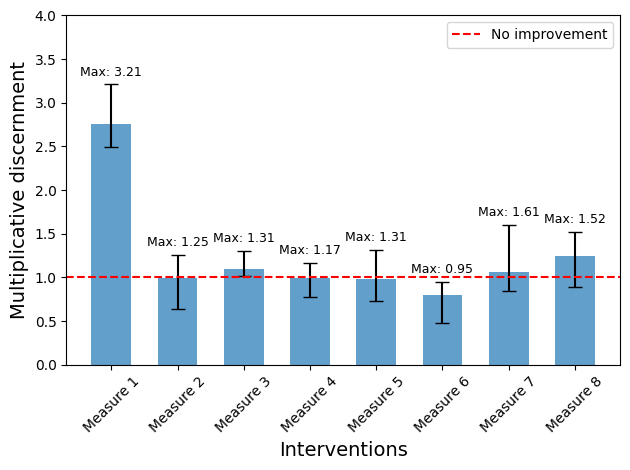

In [140]:

# Compute means and error bars for each list
means = [np.mean(mult_disc_lst_misinfo), np.mean(mult_disc_lst_anger), np.mean(mult_disc_lst_aff),
         np.mean(mult_disc_lst_outgroup), np.mean(mult_disc_lst_lowfoll), np.mean(mult_disc_lst_party),
        np.mean(mult_disc_lst_dw_nom),np.mean(mult_disc_lst_combo)]

# Calculate upper and lower error values for each measure
lower_errors = [mean - np.min(lst) for mean, lst in zip(means, [mult_disc_lst_misinfo, mult_disc_lst_anger,
                                                                 mult_disc_lst_aff, mult_disc_lst_outgroup,
                                                                 mult_disc_lst_lowfoll, mult_disc_lst_party,
                                                               mult_disc_lst_dw_nom,mult_disc_lst_combo])]

upper_errors = [np.max(lst) - mean for mean, lst in zip(means, [mult_disc_lst_misinfo, mult_disc_lst_anger,
                                                                 mult_disc_lst_aff, mult_disc_lst_outgroup,
                                                                 mult_disc_lst_lowfoll, mult_disc_lst_party,
                                                               mult_disc_lst_dw_nom,mult_disc_lst_combo])]
errors = [(np.min(mult_disc_lst_misinfo), np.max(mult_disc_lst_misinfo)),
          (np.min(mult_disc_lst_anger), np.max(mult_disc_lst_anger)),
          (np.min(mult_disc_lst_aff), np.max(mult_disc_lst_aff)),
          (np.min(mult_disc_lst_outgroup), np.max(mult_disc_lst_outgroup)),
          (np.min(mult_disc_lst_lowfoll), np.max(mult_disc_lst_lowfoll)),
          (np.min(mult_disc_lst_party), np.max(mult_disc_lst_party)),
          (np.min(mult_disc_lst_dw_nom), np.max(mult_disc_lst_dw_nom)),
         (np.min(mult_disc_lst_combo), np.max(mult_disc_lst_combo))]

# Convert error data to a format that bar() can use
error_data = np.array(errors).T
# List of labels for the x-axis
labels = ['Measure 1', 'Measure 2', 'Measure 3', 'Measure 4', 'Measure 5', 'Measure 6', 'Measure 7', 'Measure 8']

# Create a bar chart with error bars
bars = plt.bar(labels, means, yerr=[lower_errors, upper_errors], capsize=5, align='center', alpha=0.7, width=0.6)
# Create a bar chart with the new bars (without error bars)
#bars2 = plt.bar(np.arange(len(new_labels)), new_means, align='center', alpha=0.7, label='New', color='orange')

# Add a red horizontal line at y value of 1
plt.axhline(y=1, color='red', linestyle='--', label='No improvement')

# Add labels to error bars
for bar, max_value, max_value_1 in zip(bars, error_data[1], upper_errors):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + max_value_1 + 0.1, f"Max: {max_value:.2f}",
             ha='center', color='black', fontsize=9)

plt.xlabel('Interventions', fontsize=14)
plt.ylabel('Multiplicative discernment', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.ylim(0,4)
plt.tight_layout()
plt.savefig('Figures/Results_int_mult_disc_new.svg', bbox_inches='tight', format='svg')
plt.show()


In [ ]:
# get variance of SSDs for (1) adding fol-fol overlap and (2) subtracting it

In [153]:
df_no_int_2_1 = pd.read_csv("Intervention_Results/Results_August/NG_df_minus_foll_1.csv")
df_no_int_2_2 = pd.read_csv("Intervention_Results/Results_August/NG_df_minus_foll_2.csv")
df_no_int_2_3 = pd.read_csv("Intervention_Results/Results_August/NG_df_minus_foll_3.csv")
df_no_int_2_4 = pd.read_csv("Intervention_Results/Results_August/NG_df_minus_foll_4.csv")
df_no_int_2_5 = pd.read_csv("Intervention_Results/Results_August/NG_df_minus_foll_5.csv")

In [111]:
def sum_squared_differences(list1, list2):
    if len(list1) != len(list2):
        raise ValueError("Lists must have the same length")
    
    squared_diff_sum = 0
    for i in range(len(list1)):
        diff = list1[i] - list2[i]
        squared_diff_sum += diff ** 2
    
    return squared_diff_sum

In [112]:
# get variance of SSD for no intervention, adding follower overlap
ssd_lst = []
for i in range(1,6):
    section_df = globals()[f'df_no_int_{i}']
    observed_tweets = section_df["public_metrics.retweet_count"].values.tolist()
    obs_tweets_incr = [item+1 for item in observed_tweets]
    obs_tweets_log = [np.log(item) for item in obs_tweets_incr]
    sim_tweets = section_df["Simulated_retweet_count"].values.tolist()
    sim_tweets_incr = [item+1 for item in sim_tweets]
    sim_tweets_log = [np.log(item) for item in sim_tweets_incr]
    ssd = sum_squared_differences(obs_tweets_log, sim_tweets_log)
    ssd_lst.append(ssd)

In [161]:
ssd_lst

[22336.80654411481,
 21282.033514791427,
 21928.2082154864,
 22128.299038243476,
 20987.307779616174]

In [154]:
ssd_2_lst = []
for i in range(1,6):
    section_df = globals()[f'df_no_int_2_{i}']
    observed_tweets = section_df["public_metrics.retweet_count"].values.tolist()
    obs_tweets_incr = [item+1 for item in observed_tweets]
    obs_tweets_log = [np.log(item) for item in obs_tweets_incr]
    sim_tweets = section_df["Simulated_retweet_count"].values.tolist()
    sim_tweets_incr = [item+1 for item in sim_tweets]
    sim_tweets_log = [np.log(item) for item in sim_tweets_incr]
    ssd = sum_squared_differences(obs_tweets_log, sim_tweets_log)
    ssd_2_lst.append(ssd)

In [155]:
def calculate_variance(data):
    mean = sum(data) / len(data)
    squared_diff_sum = sum((x - mean) ** 2 for x in data)
    variance = squared_diff_sum / len(data)
    return variance

In [156]:
def calculate_standard_deviation(data):
    variance = calculate_variance(data)
    standard_deviation = math.sqrt(variance)
    return standard_deviation

In [165]:
# mean of SSD 1
print(np.mean(ssd_lst))

21732.53101845046


In [164]:
# mean of SSD 2
print(np.mean(ssd_2_lst))

21466.07882991575


In [117]:
print(calculate_standard_deviation(ssd_lst))

513.4932284557095


In [157]:
print(calculate_standard_deviation(ssd_2_lst))

458.47485985722835


In [158]:
# 95% CI for SSD 1

from scipy.stats import t

sample_mean = np.mean(ssd_lst)
sample_std = np.std(ssd_lst, ddof=1)  # Using ddof=1 for sample standard deviation
sample_size = len(ssd_lst)
confidence_level = 0.95

# Degrees of freedom for a t-distribution is (sample_size - 1)
degrees_of_freedom = sample_size - 1

# Calculate the critical value (t-score) based on the confidence level and degrees of freedom
t_critical = t.ppf((1 + confidence_level) / 2, df=degrees_of_freedom)

# Calculate the margin of error
margin_of_error = t_critical * (sample_std / np.sqrt(sample_size))

# Calculate the confidence interval
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

print("95% Confidence Interval:")
print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)


95% Confidence Interval:
Lower bound: 21019.688138101425
Upper bound: 22445.373898799495


In [159]:
# 95% CI for SSD 2
from scipy.stats import t

sample_mean = np.mean(ssd_2_lst)
sample_std = np.std(ssd_2_lst, ddof=1)  # Using ddof=1 for sample standard deviation
sample_size = len(ssd_2_lst)
confidence_level = 0.95

# Degrees of freedom for a t-distribution is (sample_size - 1)
degrees_of_freedom = sample_size - 1

# Calculate the critical value (t-score) based on the confidence level and degrees of freedom
t_critical = t.ppf((1 + confidence_level) / 2, df=degrees_of_freedom)

# Calculate the margin of error
margin_of_error = t_critical * (sample_std / np.sqrt(sample_size))

# Calculate the confidence interval
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

print("95% Confidence Interval:")
print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)

95% Confidence Interval:
Lower bound: 20829.613689662325
Upper bound: 22102.543970169176


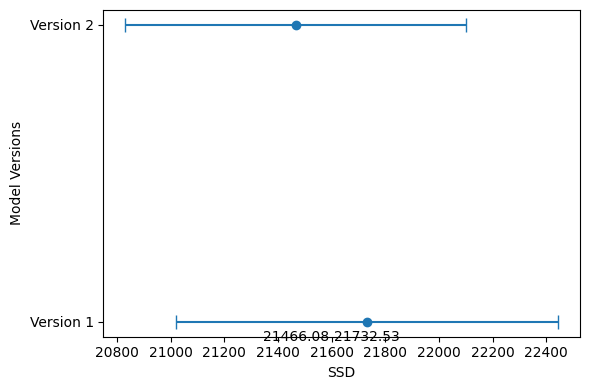

In [186]:
means = np.array([21732.53101845046, 21466.07882991575])
lower_bounds = np.array([21019.688138101425, 20829.613689662325])  # Example lower bounds of CIs
upper_bounds = np.array([22445.373898799495, 22102.543970169176])  # Example upper bounds of CIs
x_labels = ['Version 1', 'Version 2']
plt.figure(figsize=(6, 4))  # Adjust the figure size as needed

plt.errorbar(means, x_labels, xerr=[means - lower_bounds, upper_bounds - means], fmt='o', capsize=5)

# Add mean values as labels
for mean, x_label in zip(means, x_labels):
    plt.text(mean, -0.05, f'{mean:.2f}', va='center', ha='center', transform=plt.gca().transData)  # Adjust the y-coordinate
    

plt.ylabel('Model Versions')
plt.xlabel('SSD')

#plt.title('Mean SSDs of simulations and 95% CI')
plt.savefig('Figures/Follower_overlap.svg', bbox_inches='tight', format='svg')

plt.tight_layout()
plt.show()

In [118]:
# also get share of total RTs Control vs Treatment
# take mean of each list

# control
control_mean = np.mean(total_RT_control_lst)
misinfo_mean = np.mean(total_RTs_misinfo_lst)
anger_mean = np.mean(total_RTs_anger_lst)
affection_mean = np.mean(total_RTs_affection_lst)
outgroup_mean = np.mean(total_RTs_outgroup_lst)
lowfoll_mean = np.mean(total_RTs_lowfoll_lst)
partybalance_mean = np.mean(total_RTs_partybalance_lst)
combo_mean = np.mean(total_RTs_combo_lst)
dwn_mean = np.mean(total_RTs_DW_lst)

In [130]:
# misinfo
print(misinfo_mean/control_mean)
misinfo_share = misinfo_mean/control_mean

0.9783873116614525


In [131]:
# anger
print(anger_mean/control_mean)
anger_share = anger_mean/control_mean

0.8128523771179484


In [132]:
# affection
print(affection_mean/control_mean)
aff_share = affection_mean/control_mean

0.777897327159914


In [133]:
# outgroup
print(outgroup_mean/control_mean)
outgroup_share = outgroup_mean/control_mean

0.8905737711936772


In [134]:
# low follower count
print(lowfoll_mean/control_mean)
lowfoll_share = lowfoll_mean/control_mean

1.1374661279986409


In [135]:
# partybalance
print(partybalance_mean/control_mean)
party_share = partybalance_mean/control_mean

1.0048181837096255


In [136]:
# DW Nominate
print(dwn_mean/control_mean)
dwn_share = dwn_mean/control_mean

0.9846038919659942


In [137]:
# combining 2 & 6
print(combo_mean/control_mean)
combo_share = combo_mean/control_mean

0.8675380309504809


In [138]:
total_RTs_share = [misinfo_share,anger_share,aff_share,outgroup_share,lowfoll_share,party_share,
                  dwn_share,combo_share ]

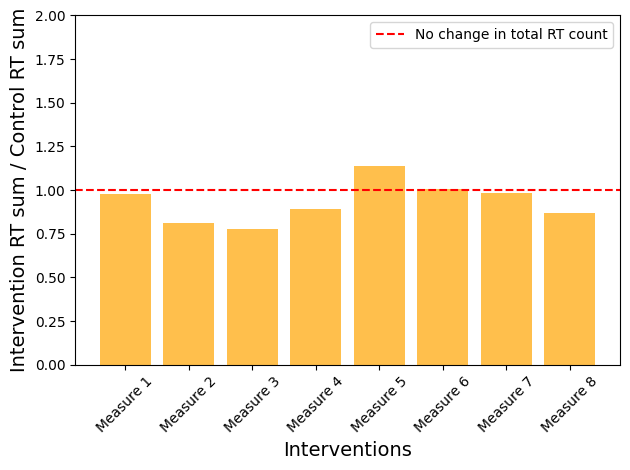

In [152]:

labels = ['Measure 1', 'Measure 2', 'Measure 3', 'Measure 4', 'Measure 5', 'Measure 6', 'Measure 7', 'Measure 8']

bars2 = plt.bar(labels, total_RTs_share, align='center', alpha=0.7,  color='orange')

# Add a red horizontal line at y value of 1
plt.axhline(y=1, color='red', linestyle='--', label='No change in total RT count')


plt.xlabel('Interventions', fontsize=14)
plt.ylabel('Intervention RT sum / Control RT sum', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.ylim(0,2)
plt.tight_layout()
plt.savefig('Figures/Results_int_RTshare_new.svg', bbox_inches='tight', format='svg')
plt.show()
